In [125]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

## Import data

In [77]:
raw_train_df = pd.read_csv('../data/train.csv')

test = pd.read_csv('../data/test.csv')
sumbission = pd.read_csv('../data/gender_submission.csv')
raw_test_df = test.merge(sumbission, how='inner', on='PassengerId')

In [49]:
raw_train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Process Data

### Clean dataset

In [106]:
def process_data(df_to_process):
    categorical_columns = pd.get_dummies(
        df_to_process[['Pclass', 'Embarked']], 
        prefix=['class', 'embark'],
        columns=['Pclass', 'Embarked'], 
    )

    processed_df = df_to_process[['Age', 'SibSp', 'Parch', 'Fare', 'Survived']].join(categorical_columns)
    
    processed_df['Sex'] = df_to_process['Sex'].replace(['female','male'],[0,1])

    dropped_na = processed_df.dropna()

    print('Dropped', len(processed_df) - len(dropped_na), 'values', 100 * (len(processed_df) - len(dropped_na)) / len(processed_df), "%")
    x = dropped_na.drop(['Survived'], axis=1)
    y = dropped_na[['Survived']]
    return x, y

x_train_proccessed, y_train_proccessed = process_data(raw_train_df)
x_test_proccessed, y_test_proccessed = process_data(raw_test_df)

processed_train_df.head(3)

Dropped 177 values 19.865319865319865 %
Dropped 87 values 20.8133971291866 %


,Age,SibSp,Parch,Fare,Survived,class_1,class_2,class_3,embark_C,embark_Q,embark_S,Sex
0,22.0,1,0,7.2500,0,0,0,1,0,0,1,1
1,38.0,1,0,71.2833,1,1,0,0,1,0,0,0
2,26.0,0,0,7.9250,1,0,0,1,0,0,1,0


### Visualise data

In [156]:
def plot(title, df_to_plot):
    fig, ax = plt.subplots(2,6,figsize=(16, 4))
    
    i = 0
    j = 0

    for c in df_to_plot.columns[0:]:
        ax[j,i].hist(df_to_plot[c])
        ax[j,i].set_title(c)
        i = i + 1
        if i == 6:
            j = 1
            i = 0

    fig.subplots_adjust(hspace=1, wspace=0.2)
    fig.suptitle(title)
    plt.show()
    
df = x_train_proccessed.join(y_train_proccessed)

survived = df.loc[(df.Survived == 1)]
died = df.loc[(df.Survived == 0)]

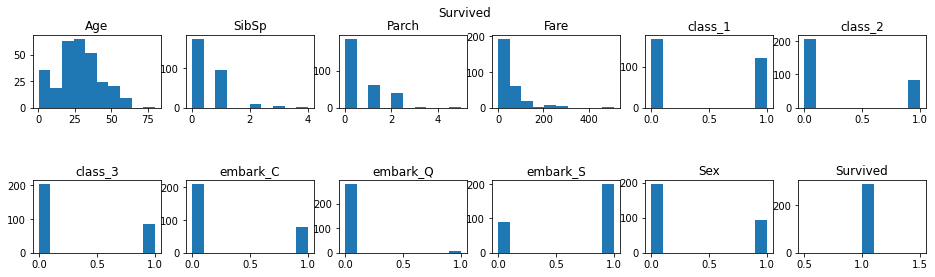

In [157]:
plot("Survived", survived)

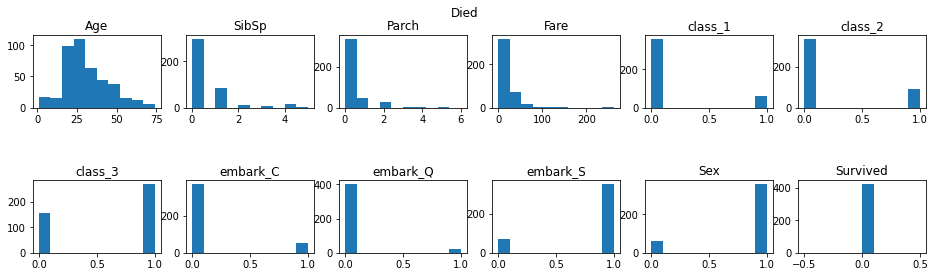

In [152]:
plot("Died", died)

### Normalise dataset

In [123]:
scaler = StandardScaler().fit(x_train_proccessed)

x_train = scaler.transform(x_train_proccessed)
x_test = scaler.transform(x_test_proccessed)

y_train = y_train_proccessed["Survived"].to_numpy()
y_test = y_test_proccessed["Survived"].to_numpy()

## Train Model

In [167]:
model = Sequential()

model.add(Dense(8, activation='relu', input_shape=(11,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=1, verbose=1)

Epoch 1/6
714/714 [==============================] - 2s 586us/step - loss: 0.6927 - accuracy: 0.5584
Epoch 2/6
714/714 [==============================] - 0s 647us/step - loss: 0.5079 - accuracy: 0.7509
Epoch 3/6
714/714 [==============================] - 0s 587us/step - loss: 0.4138 - accuracy: 0.8084
Epoch 4/6
714/714 [==============================] - 0s 588us/step - loss: 0.4282 - accuracy: 0.8041
Epoch 5/6
714/714 [==============================] - 0s 599us/step - loss: 0.4286 - accuracy: 0.8071
Epoch 6/6
714/714 [==============================] - 0s 619us/step - loss: 0.4335 - accuracy: 0.8067


In [171]:
y_pred = model.predict(x_test)

score = model.evaluate(x_test, y_test,verbose=1)

11/11 [==============================] - 0s 829us/step - loss: 0.3184 - accuracy: 0.8489
[0.3184032738208771, 0.8489425778388977]
